In [242]:
from extract import extract
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [243]:
# get data here
experiment_name = 'experiment_5'
rootpath = '/Users/nils/Downloads/results-2'
data = extract(rootpath)
print(data)

{'experiment_4': {'node-count-4': {'round-3': {'data-read': '2491', 'start-tc': '6010', 'finish': '27137', 'cpu-master': ['0.0', '89.5', '117', '255', '233', '255', '290', '279', '258', '257', '250', '245', '241', '236', '231', '226', '223', '218', '214', '210', '208', '206', '204', '193', '192', '190', '189', '187', '186', '184', '179', '173', '168', '163', '159', '154', '150', '146', '143'], 'cpu-worker': [['0.0', '165', '172', '180', '139', '114', '98.5', '86.8', '79.2', '65.3', '60.5', '56.5', '53.3', '50.7', '48.4', '46.3', '44.3', '42.7', '49.6', '55.8', '64.9', '67.0', '68.6', '70.3', '98.6', '127', '160', '179', '200', '211', '224', '246', '258', '257', '271', '265', '280', '293', '293', '302', '301', '311', '318', '316', '312', '307', '300', '294', '288', '283', '277', '272', '267', '262', '257'], ['0.0', '154', '169', '135', '110', '95.1', '83.8', '75.2', '70.3', '65.1', '60.2', '56.3', '65.9', '76.0', '100', '139', '144', '149', '189', '204', '243', '288', '316', '333', '333

In [244]:
def plot_cpu_utilization(number_of_nodes, round, save_to, y_ticks = None, number_of_values = None, x_min_max = None, y_min_max = None):
    
    experiment = data[experiment_name]['node-count-' + number_of_nodes]['round-' + round]
    
    
    cpu_master = experiment['cpu-master']
    cpu_workers = experiment['cpu-worker']
    
    len_master = len(cpu_master)
    len_workers = list(map(len, cpu_workers))
    
    # plot the data
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.set_xlabel("Time in seconds")
    ax.set_ylabel("CPU utilization")
    
    if x_min_max:
        ax.set_xlim(x_min_max)
    
    if y_min_max:
        ax.set_ylim(y_min_max)
    
    colors= ['b', 'g', 'y', 'c', 'm', '#ff6600', '#666633', '#009999'] 
    
    # plot master
    if number_of_values:
        cpu_master_values = cpu_master[:number_of_values]
    else:
        cpu_master_values = cpu_master
        
    X = np.arange(len(cpu_master_values))
    np_master = np.array(cpu_master_values).astype(float)
    ax.plot(X, np_master, color='r', label='master')
    
    for i in range(0, len(cpu_workers)):
        if number_of_values:
            cpu_worker_values = cpu_workers[i][:number_of_values]
        else:
            cpu_worker_values = cpu_workers[i]
        
        X = np.arange(len(cpu_worker_values))
        np_worker = np.array(cpu_worker_values).astype(float)
        ax.plot(X, np_worker, color=colors[i], label='worker')
    
    ax.yaxis.grid()
    if y_ticks:
        plt.yticks(y_ticks)
    
    plt.legend()
    
    # display the plot
    plt.show()
    fig.savefig(save_to)


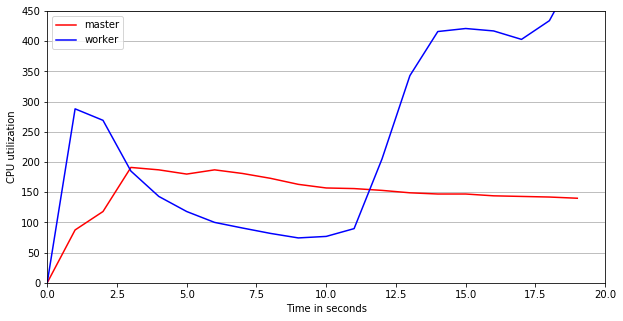

In [245]:
plot_cpu_utilization('1', '2', 'utilization_details-1.pdf', x_min_max=(0,20), y_min_max=(0,450), number_of_values=20)

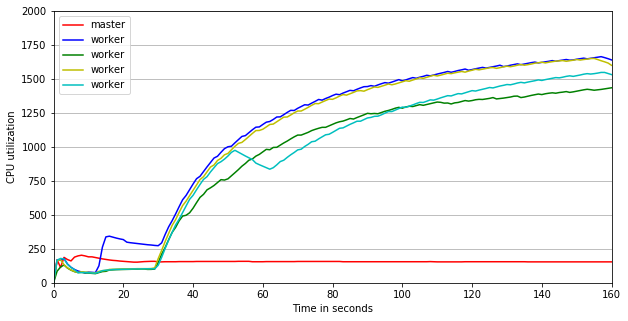

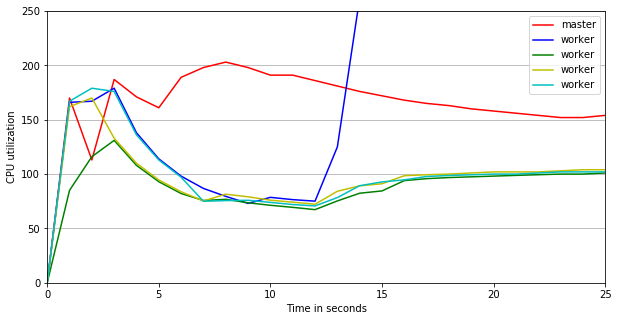

In [249]:
plot_cpu_utilization('4', '3', 'utilization-1.pdf', x_min_max=(0,160), y_min_max=(0,2000))

plot_cpu_utilization('4', '3', 'utilization-1.pdf', x_min_max=(0,25), y_min_max=(0,250))


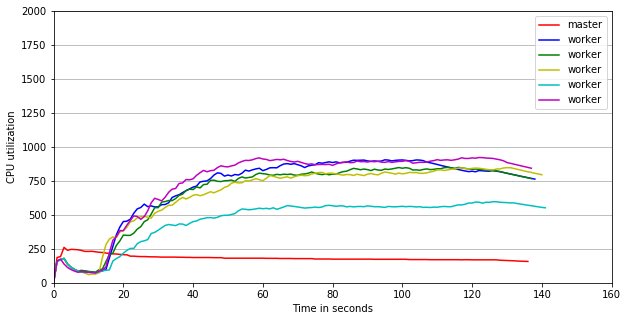

In [247]:
plot_cpu_utilization('5', '3', 'utilization-2.pdf', x_min_max=(0,160), y_min_max=(0,2000))

